In [9]:
import bs4
import requests
from fsearch_core import SearchResult, get_random_header

In [25]:

def search_google(q: str) -> list[SearchResult]:
    # search google
    
    cookie_data = {
    "CAPTCHA_SOLVER_ACTIVE": "false",
    "GOOGLE_OGPC_COOKIE": "",
    "GOOGLE_NID_COOKIE": "",
    "GOOGLE_AEC_COOKIE": "",
    "GOOGLE_1P_JAR_COOKIE": "",
    "GOOGLE_ABUSE_COOKIE": ""
    }
    
    cookies = {
        "OGPC": cookie_data["GOOGLE_OGPC_COOKIE"],
        "NID": cookie_data["GOOGLE_NID_COOKIE"],
        "AEC": cookie_data["GOOGLE_AEC_COOKIE"],
        "1P_JAR": cookie_data["GOOGLE_1P_JAR_COOKIE"],
        "GOOGLE_ABUSE_EXEMPTION": cookie_data["GOOGLE_ABUSE_COOKIE"]
    }
    
    headers = get_random_header()
    
    r = requests.get(f"https://www.google.com/search?q={q}", headers=headers, cookies=cookies)
    
    soup = bs4.BeautifulSoup(r.text, "html.parser")
    
    # get search results
    results = []
    for i in soup.find_all("div", class_="g"):
        try:
            # needed info:
            # title
            # url
            # description
            # image url
            # provider (google)
            # provider url (google.com)
            # is_nsfw (bool)
            
            title = i.find("h3").text
            link = i.find("a")["href"]
            
            try:
                description = i.find("span", class_="aCOpRe").text
            except:
                description = ""
                
            image = i.find("img")["src"]
            provider = "Google"
            provider_url = "https://www.google.com"
            is_nsfw = False
            
            results.append(SearchResult(title, link, description, image, provider, provider_url, is_nsfw))
        
        except Exception as e:
            print(e)
    
    return results
    

[<fsearch_core.SearchResult object at 0x7f324112e510>, <fsearch_core.SearchResult object at 0x7f3240d055d0>, <fsearch_core.SearchResult object at 0x7f3236ee91d0>, <fsearch_core.SearchResult object at 0x7f3236bc19d0>, <fsearch_core.SearchResult object at 0x7f3236bf0310>, <fsearch_core.SearchResult object at 0x7f3236bf0510>, <fsearch_core.SearchResult object at 0x7f3236bf0550>, <fsearch_core.SearchResult object at 0x7f3236bf04d0>, <fsearch_core.SearchResult object at 0x7f3236bf0350>]
{'title': 'Stiftung Warentest | Unabhängig. Objektiv. Unbestechlich.', 'url': 'https://www.test.de/', 'description': '', 'image_url': '', 'provider': 'Google', 'provider_url': 'https://www.google.com', 'is_nsfw': False}
{'title': 'Stiftung Warentest | Unabhängig. Objektiv. Unbestechlich.', 'url': 'https://www.test.de/', 'description': '', 'image_url': '', 'provider': 'Google', 'provider_url': 'https://www.google.com', 'is_nsfw': False}
{'title': 'Test - Wikipedia', 'url': 'https://en.wikipedia.org/wiki/Test'
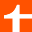
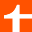
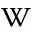
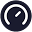
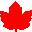
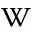
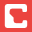
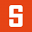
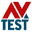

In [26]:
r = search_google("test")

print(r)

for elem in r:
    print(elem.to_json())